# Notebook activity A1.6 Comparing alternative specifications of a Mincerian wage equation

As in Notebook activity A1.5, in this notebook we will be using the Panel Study of Income Dynamics (PSID) dataset. We will use one time period of the `psid` dataset to compare the estimates of the coefficient of `educ` obtained when using different Mincerian wage equations. The baseline Mincerian equation is as follows:

$$\log(w_i) = \log(w_0) + \alpha \texttt{ educ}_i + \beta_1 \texttt{exper}_i + \beta_2 \texttt{exper}_i^2 + u_i,$$

and we will be comparing the coefficient of `educ` of this model with alternative models that include more or fewer regressors.
 
As you saw in Notebook activity A1.5, the `psid` dataset contains panel data. In this notebook, we will extract a cross-sectional dataset from `psid` by looking only at the first time period. We then estimate the coefficients of the Mincerian wage equation for some models with different numbers of regressors.

If these regressors are significant in explaining wage rates, and should the coefficient of `educ` vary substantially across the different models, then it is possible that the omission of some regressors from the baseline model is causing an *omitted variable bias*.

## (a) Getting started

We start with investigating the `psid` dataset and reviewing its structure using the same procedures as in Notebook activity A1.5.

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the psid data frame
data(psid)
# Check the data frame has loaded OK
head(psid)

### (ii)

Use the code cell below to check how many individuals, and how many time periods there are in this panel dataset.

(Look back at Notebook activity A1.5 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below. This confirms there are 595 individuals and 7 time periods.

In [2]:
length(unique(psid$id)) # finds the number of individuals
length(unique(psid$period)) # finds the number of time periods

[1] 595

[1] 7

### (iii)

Use the code cell below to check how many observations there are in total, and hence to confirm that this is a balanced panel.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

This shows that there are 4165 observations in total, and as this is the same as the number of individuals multiplied by the number of time periods, it confirms that this is a balanced panel. 

In [3]:
# the number of rows and hence the total number of observations in the dataset
nrow(psid) 

# the number of individuals times the number of time periods
length(unique(psid$id)) * length(unique(psid$period)) 

[1] 4165

[1] 4165

## (b) Extracting a cross-sectional dataset

To prepare for the estimation of the Mincerian wage equation, we extract a cross-sectional dataset by filtering `psid` to include only the first time period.

### (i)

In the code cell below, write code to extract data from the first time period, save it in a new object called `psidWave1`. (Look back at Notebook activity 5.5 if you need a reminder of how to do this.) How many observations are there in the extracted dataset?

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

You will see that there are 595 observations in `psidWave1`.

Running the code below performs the required filtering and saves the extracted data in `psidWave1`. 

In [4]:
# Filter the data to include only period 1 and saves it in `psidWave1`
psidWave1 <- psid[psid$period == 1, ]

# Obtain the number of observations in `psidWave1`
nrow(psidWave1)

[1] 595

###  <a class="tocSkip">

Since psid is a balanced dataset and as there are seven periods available, when we restrict the data to the first time period we have exactly one seventh of the observations remaining. So in the rest of the notebook we are going to work only with the data in `psidWave1` rather than in `psid`.

## (c) Investigating the distributions of the model variables

Now, we investigate the distributions of the dependent variable and the regressors to be included in the Mincerian wage equation and check whether any data transformations may be required. 

### (i)

Obtain a summary for all variables in the `psidWave1` data frame.

#### Solution <a class="tocSkip">

Running the code below gives the required summary. Notice that it treats all variables as continuous, even though both `educ` and `exper` are available only as discrete variables.

In [5]:
summary(psidWave1)

     exper         occupation         gender            educ      
 Min.   : 1.00   Min.   :0.0000   Min.   :0.0000   Min.   : 4.00  
 1st Qu.: 7.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:12.00  
 Median :15.00   Median :1.0000   Median :0.0000   Median :12.00  
 Mean   :16.85   Mean   :0.5244   Mean   :0.1126   Mean   :12.85  
 3rd Qu.:26.00   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:16.00  
 Max.   :45.00   Max.   :1.0000   Max.   :1.0000   Max.   :17.00  
   ethnicity          wageLog          period        id       
 Min.   :0.00000   Min.   :5.011   Min.   :1   Min.   :  1.0  
 1st Qu.:0.00000   1st Qu.:6.116   1st Qu.:1   1st Qu.:149.5  
 Median :0.00000   Median :6.425   Median :1   Median :298.0  
 Mean   :0.07227   Mean   :6.375   Mean   :1   Mean   :298.0  
 3rd Qu.:0.00000   3rd Qu.:6.653   3rd Qu.:1   3rd Qu.:446.5  
 Max.   :1.00000   Max.   :6.906   Max.   :1   Max.   :595.0  

### (ii)

Calculate the standard deviation of the following variables: `exper`, `educ` and `wageLog`.

#### Solution <a class="tocSkip">

Running the code below gives the required standard deviations for all variables.

In [6]:
sd(psidWave1$exper)
sd(psidWave1$educ)
sd(psidWave1$wageLog)

[1] 10.79018

[1] 2.790006

[1] 0.3884257

### (iii)

Display the distributions of the variables `wageLog`, `educ` and `exper` by plotting their histograms.

#### Solution <a class="tocSkip">

Running the code below gives the required histograms.

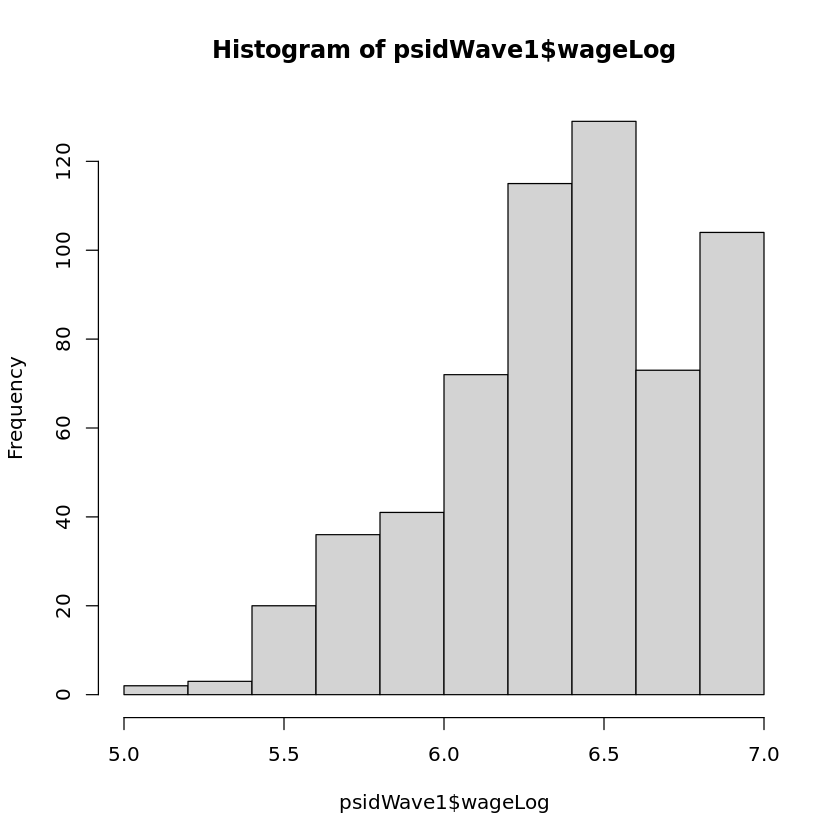

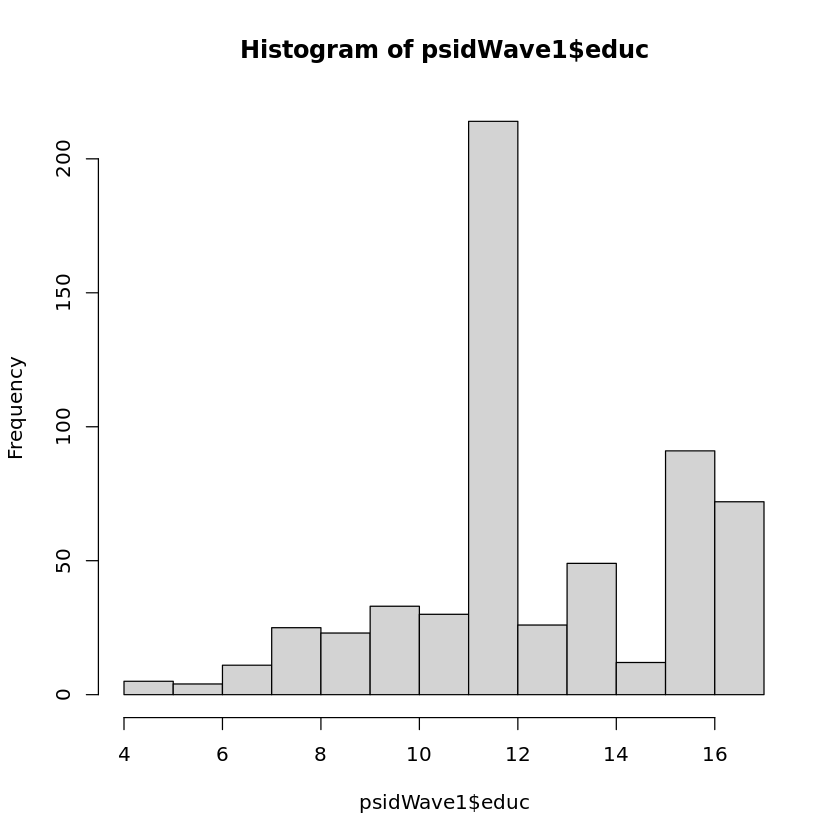

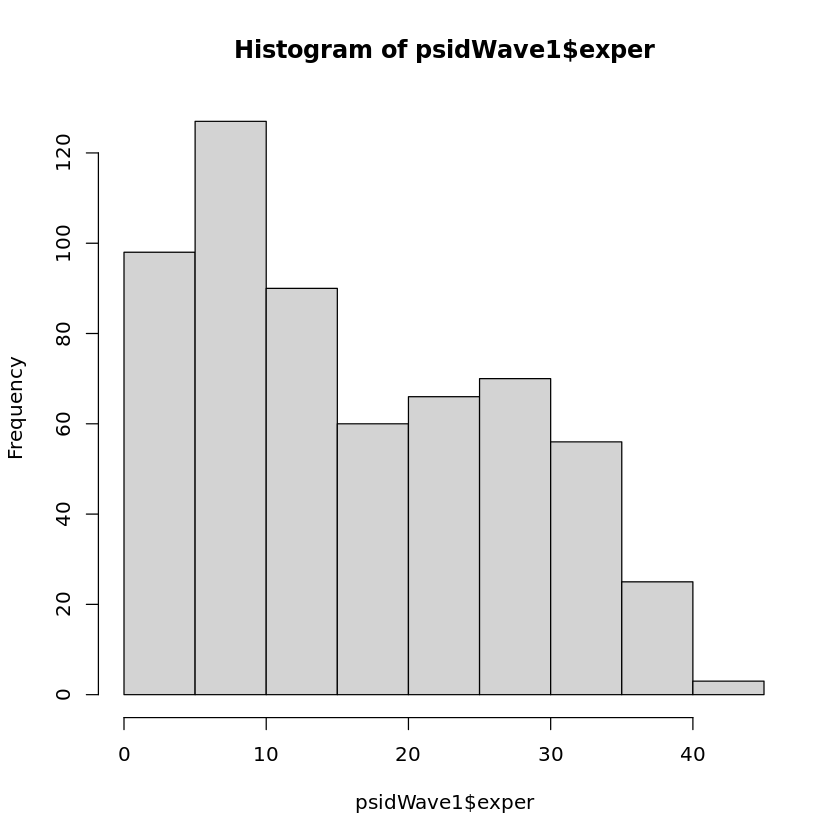

In [7]:
hist(psidWave1$wageLog)
hist(psidWave1$educ)
hist(psidWave1$exper)

### (iv)

Based on these histograms, are there any data transformations that may be required? Briefly explain your reasoning.

#### Solution <a class="tocSkip">

The distribution of `wageLog` shows some left skewness but arguably this is not severe enough to warrant further transformation.

The distribution of `education` shows a peak at 12 years (the usual school leaving age) with low values below this level, followed by a roughly uniform distribution above.

The distribution of `experience` shows some right skewness.

In summary, no transformations may be needed.

## (d) Estimating the basic Mincerian wage equation

You are now in a position to estimate the basic Mincerian wage equation and analyse the distribution of the residuals through the diagnostic plots of the model.

We will then repeat the fitting of the Mincerian wage equation for specifications with `educ` only and then with `educ` and `exper`.

### (i) 

Create a new variable `experSq` the values of which are the squares of the values in `exper` and add it to the `psidWave1` data frame.

#### Solution <a class="tocSkip">

The required code is given below. Note that running the code does not produce any output.

In [8]:
psidWave1$experSq <- psidWave1$exper * psidWave1$exper 

### (ii)

Estimate the basic Mincerian wage equation using the three variables `educ`, `exper` and `experSq` from the `psidWave1` data frame, saving the results in an object called `mincerFull`. Obtain the diagnostic plots of the estimated equation.

#### Solution <a class="tocSkip">

The required code and resulting plots are given below

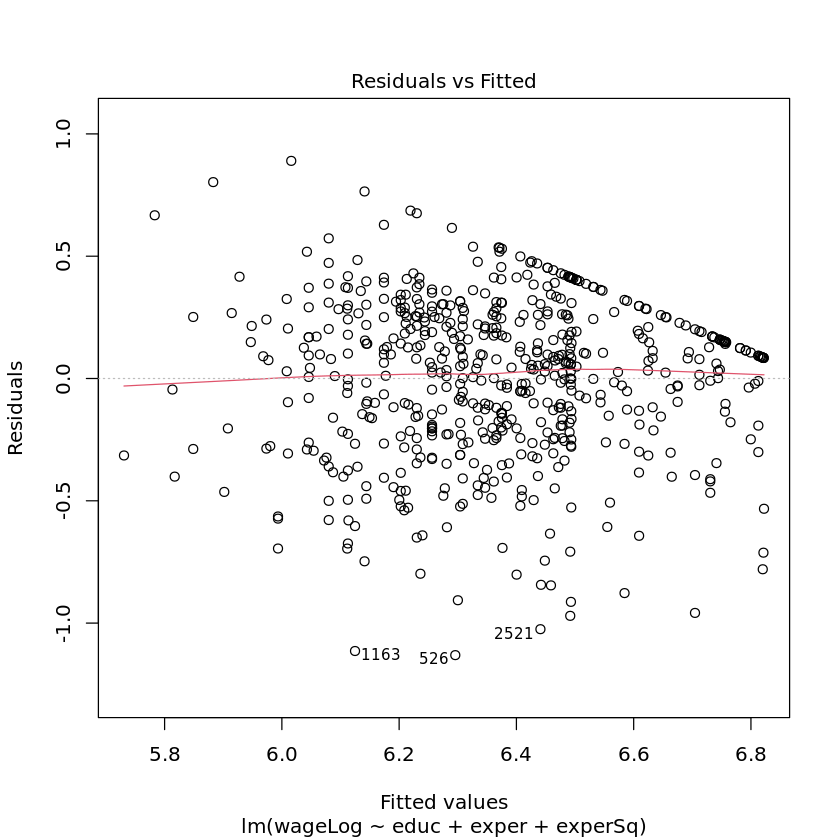

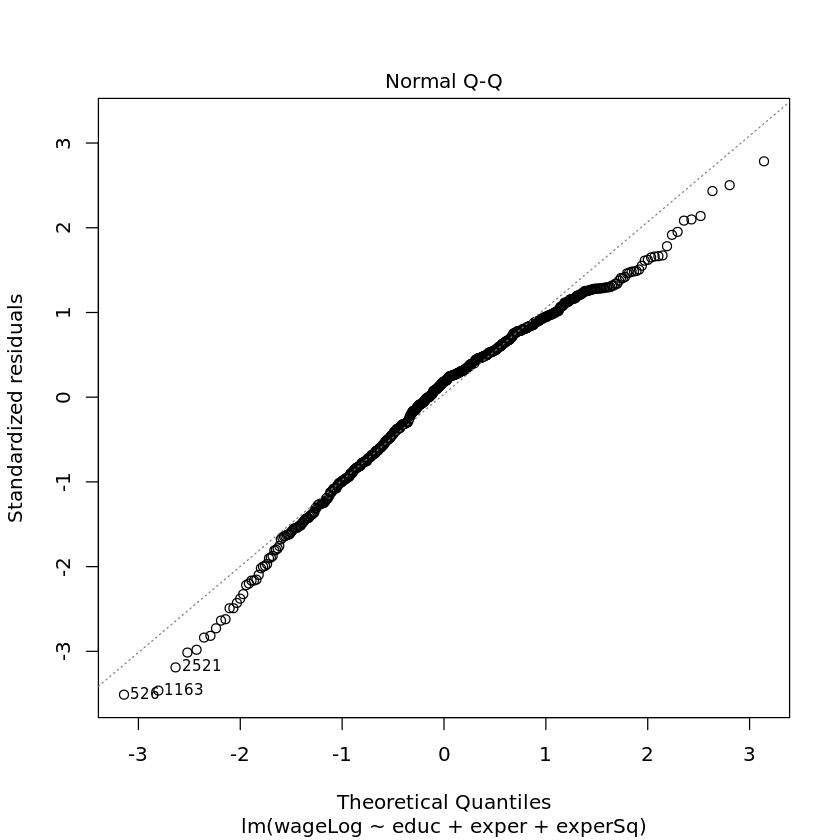

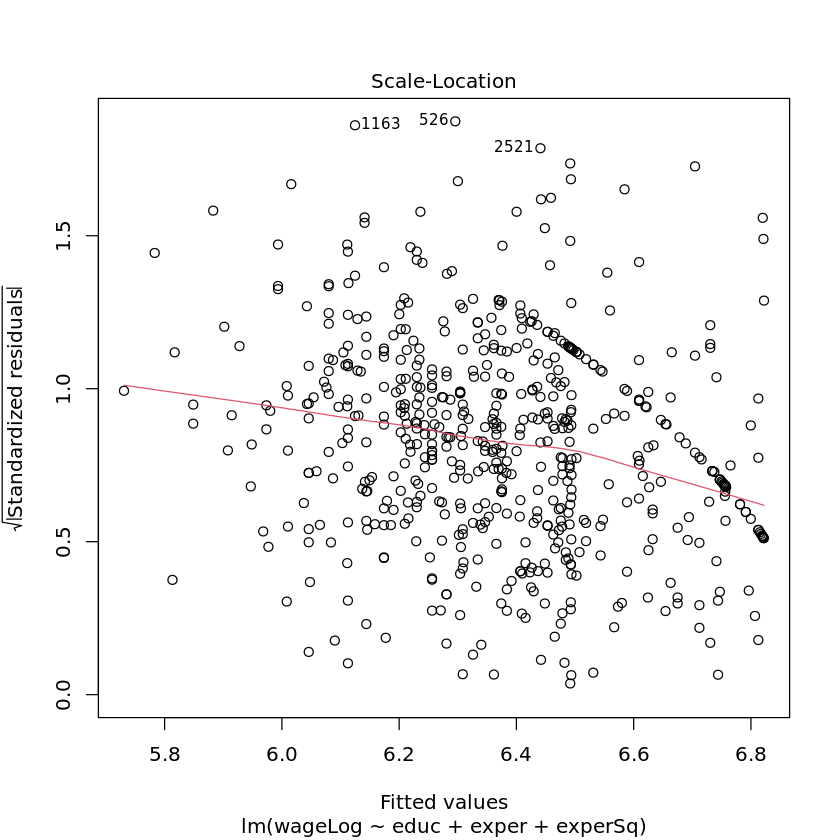

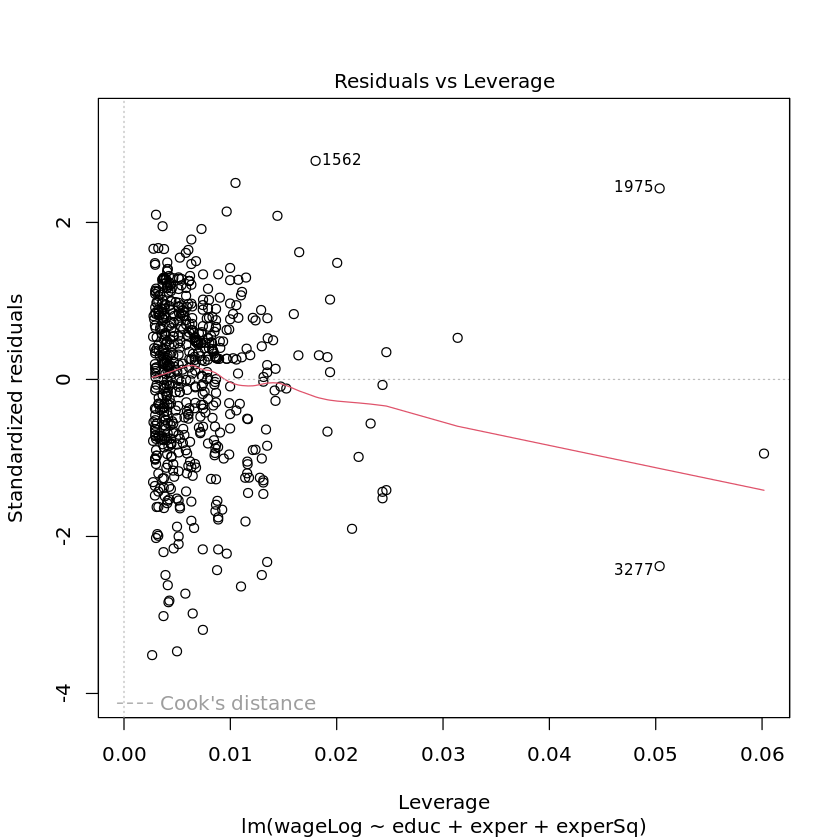

In [9]:
# Estimate the model
mincerFull <- lm(wageLog ~ educ + exper + experSq, data = psidWave1)

# Obtain the residual plots
plot(mincerFull)

### (iii)

What do the plots you obtained in part (ii) tell you about the OLS assumptions of the model?

#### Solution <a class="tocSkip">

The plot of residuals vs fitted values shows that the the residuals of the full Mincerian wage equation are roughly randomly scattered around zero. This means that the assumptions of a zero mean and a constant variance of the residuals seem to be reasonable.

The Normal Q-Q plot does not show any serious curvature, which means that the residuals are close to being normally distributed.

In summary, the residuals of the full Mincerian wage equation seem to reasonable comply with the key assumptions of the OLS model.

### (iv)

Repeat what you did in part (d)(ii), this time dropping the `experSq` variable. 

This means, estimate the Mincerian wage equation using only the two variables `educ` and `exper` from the `psidWave1` data frame, save the results in an object called `mincerWithExper` and obtain the diagnostic plots of the estimated equation.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

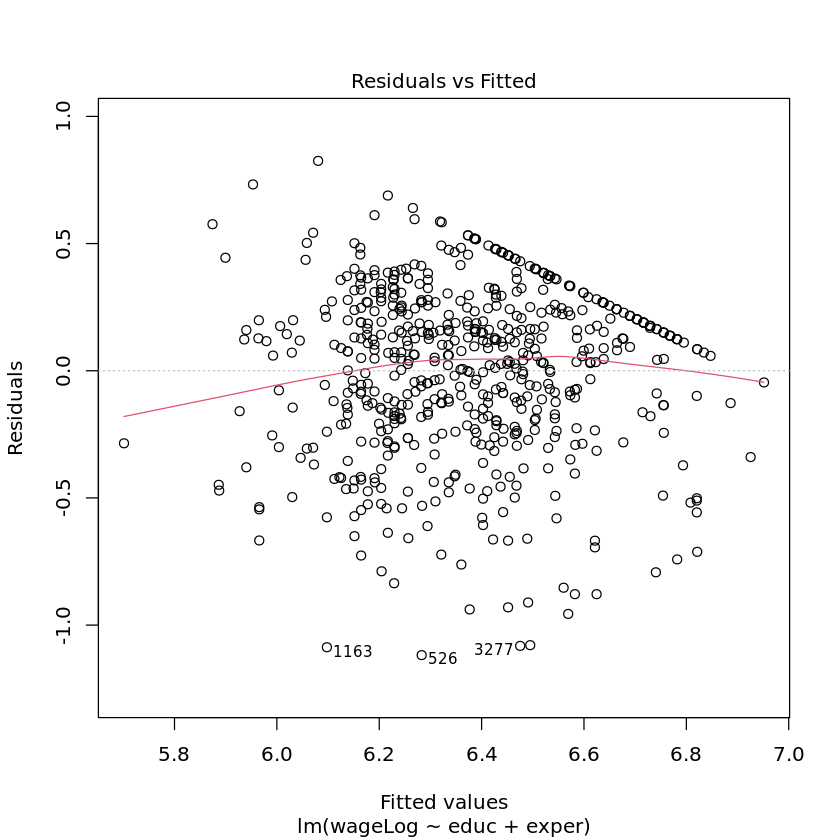

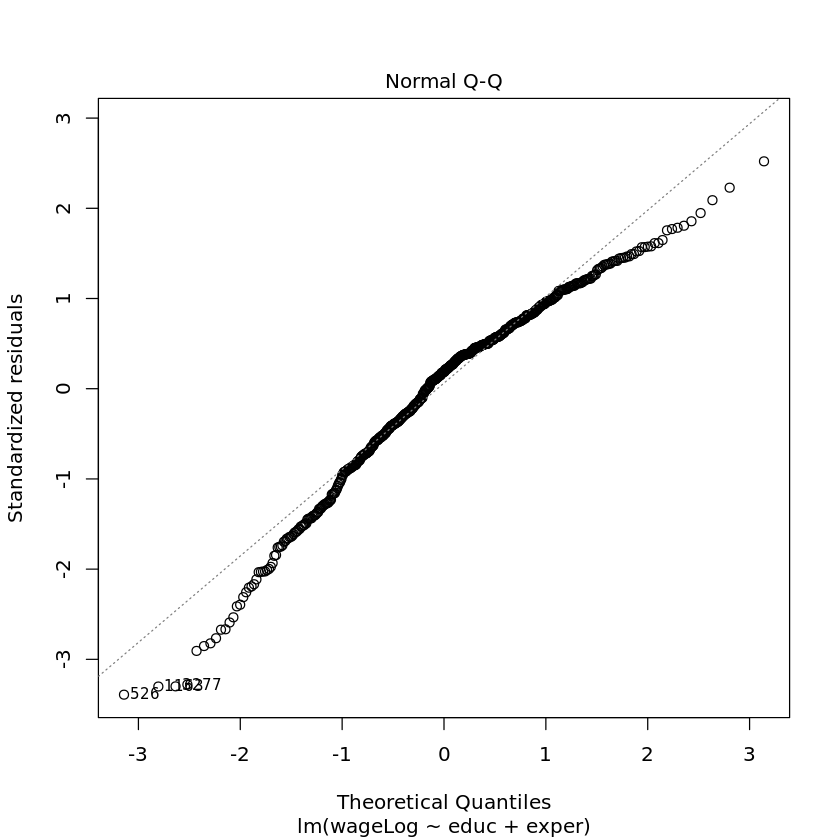

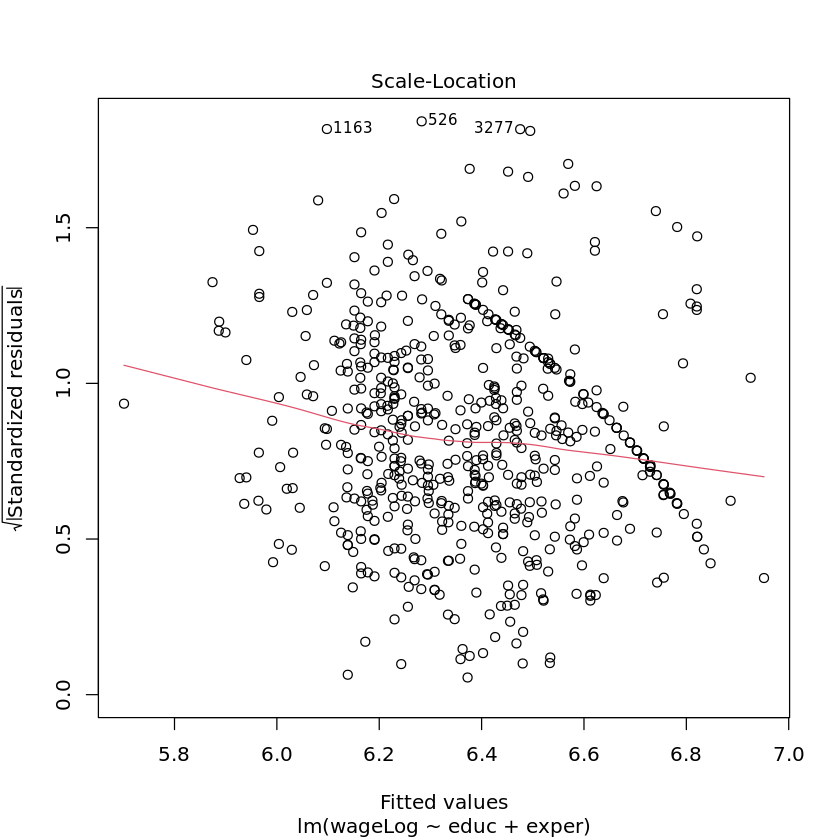

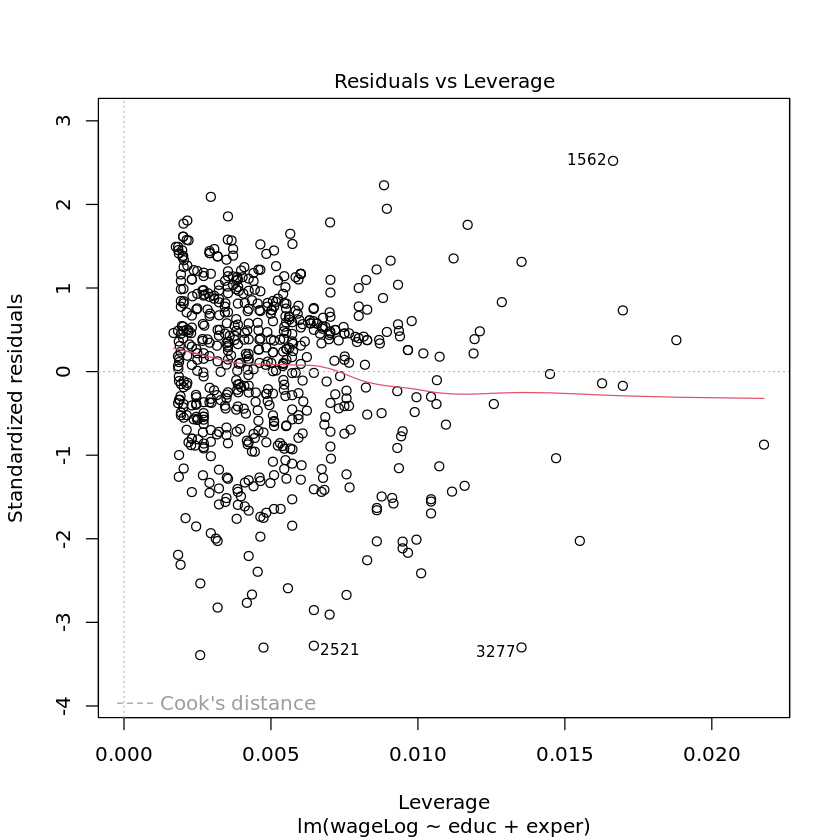

In [10]:
# Estimate the model
mincerWithExper <- lm(wageLog ~ educ + exper, data = psidWave1)

# Obtain the residual plots
plot(mincerWithExper)

### (v)

Are the plots you obtained in part (d)(iv) much different from those you obtained in part (d)(ii)? Do the OLS assumptions seem reasonable for the model you fitted in part (d)(iv)?

#### Solution <a class="tocSkip">

The plots look more or less similar to those of the full equation. Hence, the OLS assumptions still seem to hold.

### (vi)

Now drop the `exper` variable from the model. This means, estimate the Mincerian wage equation using only the `educ` variable from the `psidWave1` data frame, saving the results in an object called `mincerEducOnly`. Obtain the diagnostic plots of the estimated equation.

#### Solution <a class="tocSkip">

Running the code below fits the equation using `educ` only, saves the results of the fitted model in the object `mincerEducOnly` and produces its diagnostic plots.

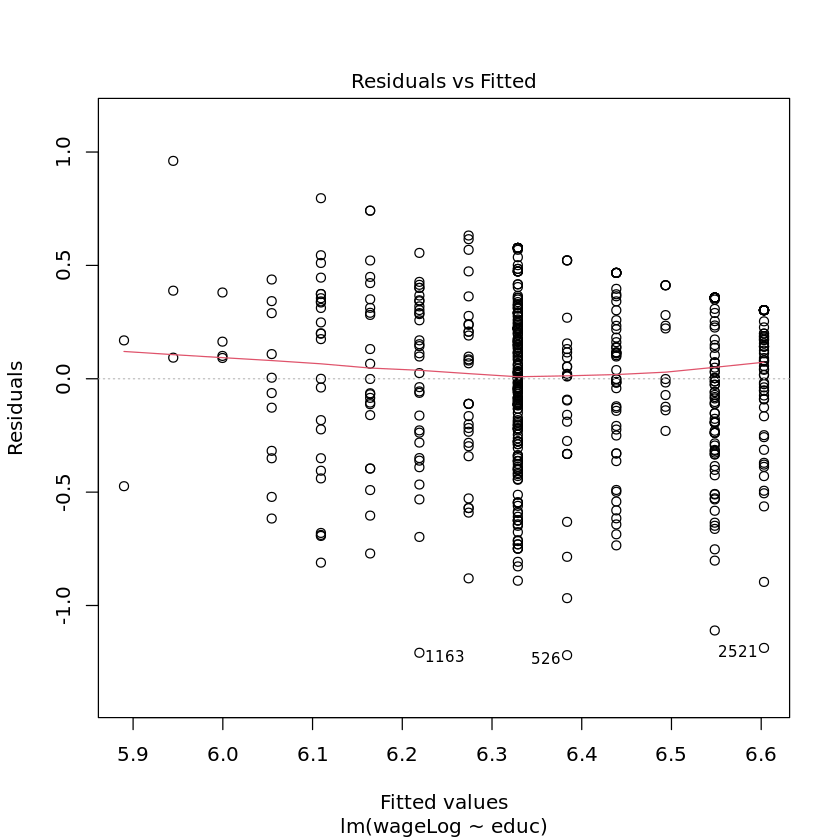

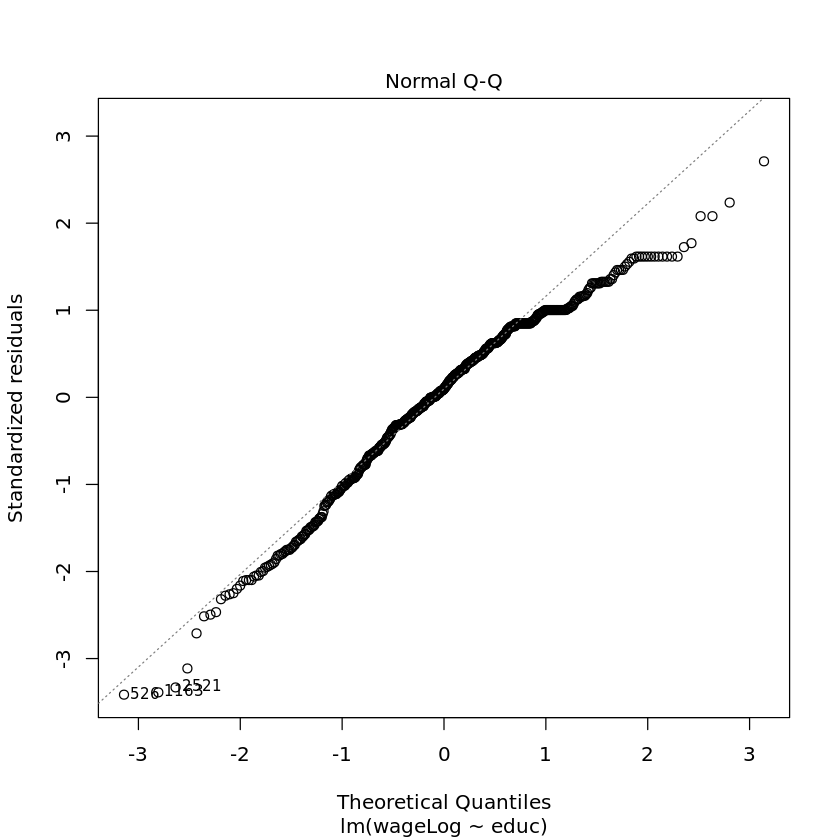

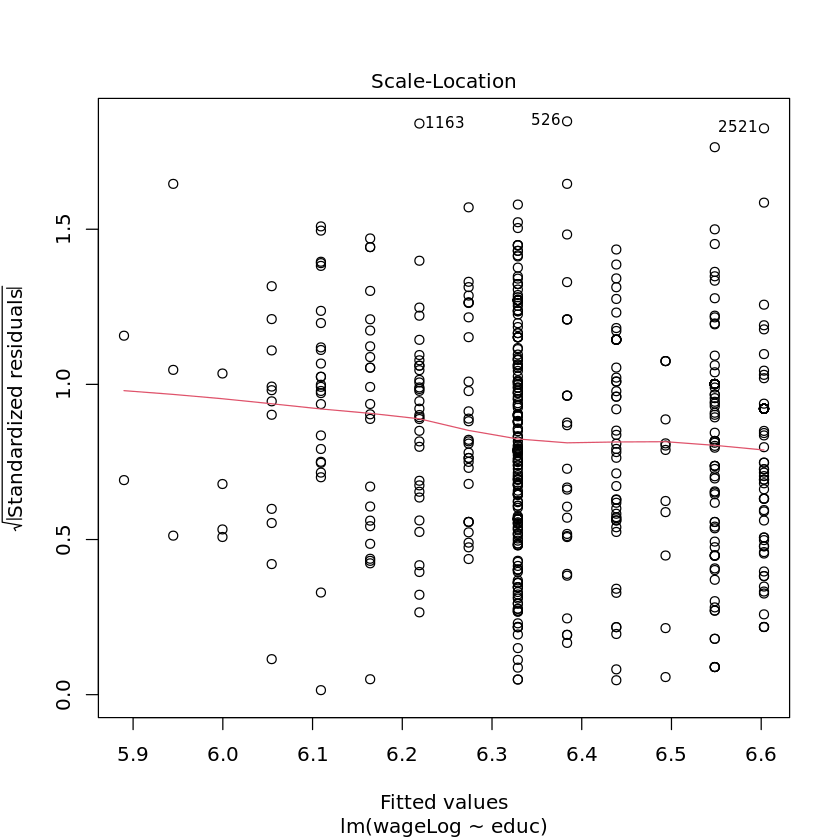

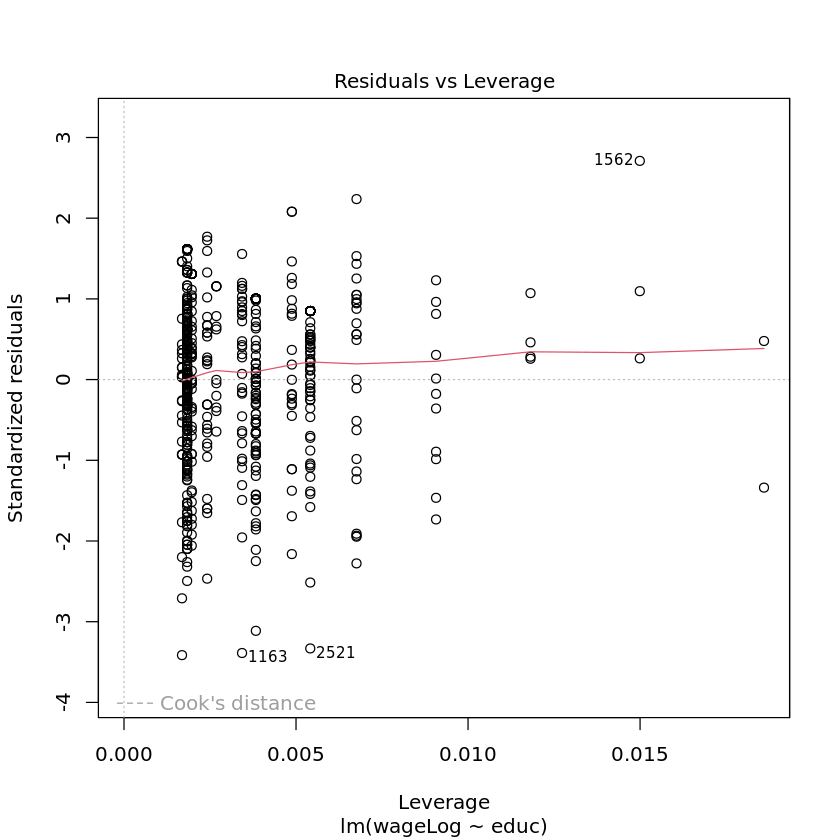

In [11]:
 mincerEducOnly <- lm(wageLog ~ educ, data = psidWave1)
 plot(mincerEducOnly)

### (vii)

Are the plots you obtained in part (d)(vi) much different from those in parts (d)(ii) and (d)(iv)? Do you think the diagnostic plots can be a valid tool here to clearly distinguish between the performance of the three fitted equations?

#### Solution <a class="tocSkip">

The plots look more or less similar to those of the estimated equations in parts (d)(ii) and (d)(iv). Hence, analysing the diagnostic plots, there is a little to distinguish between the models.

## (e) Comparing Mincerian wage equations using adjusted $R^2$

You have just seen that the diagnostic plots do not help that much to distinguish between Mincerian wage equations that contain different numbers of regressors. 

Instead, we will now be using the adjusted $R^2$ statistic to compare the three equations you fitted in part (d).

### (i)

Obtain the adjusted $R^2$ values across the three equations you fitted in part (d). (Remember that adjusted $R^2$ is part of the summary information given for regression model fits.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

So the adjusted $R^2$ values are as follows:

| Model | $R^2_a$|
| --- | --- |
| `mincerFull` | 0.3106 | 
| `mincerWithExper` | 0.2778 |
| `mincerEducOnly` | 0.1539 | 

In [12]:
summary(mincerFull)
summary(mincerWithExper)
summary(mincerEducOnly)


Call:
lm(formula = wageLog ~ educ + exper + experSq, data = psidWave1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13097 -0.20816  0.05876  0.23227  0.88976 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.1474763  0.0773523  66.546  < 2e-16 ***
educ         0.0656673  0.0048646  13.499  < 2e-16 ***
exper        0.0387999  0.0049302   7.870 1.70e-14 ***
experSq     -0.0006739  0.0001248  -5.402 9.58e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3225 on 591 degrees of freedom
Multiple R-squared:  0.3141,	Adjusted R-squared:  0.3106 
F-statistic: 90.22 on 3 and 591 DF,  p-value: < 2.2e-16



Call:
lm(formula = wageLog ~ educ + exper, data = psidWave1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11811 -0.19243  0.06102  0.23341  0.82514 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.306581   0.073207   72.49   <2e-16 ***
educ        0.066067   0.004978   13.27   <2e-16 ***
exper       0.013050   0.001287   10.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3301 on 592 degrees of freedom
Multiple R-squared:  0.2803,	Adjusted R-squared:  0.2778 
F-statistic: 115.3 on 2 and 592 DF,  p-value: < 2.2e-16



Call:
lm(formula = wageLog ~ educ, data = psidWave1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21887 -0.22138  0.03424  0.29058  0.96102 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.670396   0.069066   82.10   <2e-16 ***
educ        0.054866   0.005254   10.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3573 on 593 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1539 
F-statistic:   109 on 1 and 593 DF,  p-value: < 2.2e-16


### (ii)

What do you conclude from the adjusted $R^2$ values you obtained in part (e)(i)?

#### Solution <a class="tocSkip">

The $R^2_a$ has decreased from 0.31 to roughly its half, 0.15, when `exper` and `experSq` were both dropped from the model. This suggests a significant decrease in the explanatory power of the model without any measure of `exper`. Nevertheless, the explanatory power is relatively low in all the models.

In Unit A1, you also saw that removing `exper` not only causes a loss in the explanatory power, but what is more, creates a bias of the coefficient of `educ`. When `exper` is included, the `educ` coefficient estimate increased, which suggests a negative omitted variable bias.

## (f) Investigating the possible bias of having excluded other variables

We have just seen that `exper` should not be dropped from the Mincerian wage equation that contains `educ`. But could there be other variables in the dataset that might cause omitted variable bias? You will now be looking at some other variables in `psidWave1` data frame and discussing whether their omission may cause bias, and what the direction of this bias is likely to be.

Recall, from Subsection 4.2.1 of Unit A1, that the omitted variable bias occurs when:
- an omitted variable is correlated with an included regressor in the model
- there is an effect of the omitted variable on the dependent variable, even when the included regressor is kept constant.

Looking at the other variables in the `psidWave1` data frame, we can think about a set of possible variables that are correlated with `educ` and with the dependent variable `wageLog`. This set of variables may need to be included in the model to avoid the omitted variable bias.

Thinking about possible sources of bias in the coefficient of education only, we suggest that the three variables that could systematically impact wage rates are `occupation`, `gender` and `ethnicity`. You may have come up with a different set of variables as long as you use valid economic rationale. 

A correlation matrix of these three variables with `educ` is a good place to start since it allows you to verify the first of the two conditions for omitted variable bias to occur.  

### (i)

Obtain a correlation matrix that gives the correlations of the set of suggested variables `occupation`, `gender` and `ethnicity`, together with those of the model variables `wageLog`,`educ`,`exper` and `experSq` by running the following command.

In [ ]:
cor(psidWave1[,c("occupation", "gender", "ethnicity", "wageLog", "educ", 
                 "exper", "experSq")])

Using this correlation matrix, we now investigate the possible impact of each of the three variables `occupation`, `gender` and `ethnicity`, and discuss whether they may need to be included in the model specification.

**Possible effect of `occupation`**

`occupation` is a binary variable that takes the value of 1 if the individual is a 'blue collar' worker, and 0 otherwise. It is not clear how the dividing lines have been drawn around these categories; normally 'white collar' workers, i.e. 'professional' employees (those with university degrees) are more highly paid but the '0' category here includes all workers not classed as blue collar, so will be a mixture of unskilled (lower paid) and professional (higher paid).
  
Occupation is likely to be correlated with education since blue collar workers will normally have lower levels of educational attainment (the correlation matrix shows a negative correlation of $-0.6$ between `occupation` and `educ`). Conditional on education, we may also observe a direct effect of occupation on wages for reasons that go beyond individual choices and circumstances: some occupations and industries are more unionised, raising wages; some occupations are systematically low paid such as the care industry, which is not composed of a workforce of lower education than say transport. It is therefore likely that omitting `occupation` is causing bias to the coefficient of `educ`, but the direction of the bias is unclear.

**Possible effect of `gender`**

`gender` is also a binary variable with the value of 1 for female, and 0 for male. Repeating the above analysis for `gender`, we argue that excluding `gender` is likely to cause bias to the coefficient of `educ` if the following apply:

- Gender and education are believed to be correlated. We can see from the correlation matrix that `gender` and `educ` are negatively correlated, but with a very little correlation coefficient. 

- Conditional on education, there is a direct effect of gender on wages; this is the case if there is discrimination in the labour market for instance.

Omitting `gender` may not cause too much bias to the results, since the correlation with `educ` is very low. The effect on the coefficient of `exper` on the other hand, could potentially be much worse.

**Possible effect of `ethnicity`**

`ethnicity` is another binary variable with the value of 1 for black individuals, and 0 for other ethnicities.

Ethnicity has a negative correlation with education (the correlation matrix shows a negative correlation of $-0.12$ between `ethnicity` and `educ`), suggesting black people have lower educational attainment. Conditional on education, there should also be a negative effect of ethnicity on wages, for instance, also due to discrimination.

A negative correlation between `educ` and `ethnicity`, as well as a negative impact of `ethnicity` (due to discrimination) on log wages, even when holding education constant, means that the sign of both terms of our bias is negative. The product of the two terms is therefore positive, suggesting a positive omitted variable bias. We expect the "true" effect to be lower than the estimated coefficient if ethnicity is omitted. 

### (ii)

Estimate the augmented Mincerian wage equation, that is the equation including `occupation`, `gender` and `ethincity` in addition to `educ`, `exper` and `experSq`). Obtain the summary of the model. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below. 

In [14]:
mincerMax <- lm(wageLog ~ educ + exper + experSq + occupation + gender + 
                ethnicity, data = psidWave1)
summary(mincerMax)


Call:
lm(formula = wageLog ~ educ + exper + experSq + occupation + 
    gender + ethnicity, data = psidWave1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1422 -0.1803  0.0414  0.2026  0.8002 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.4592245  0.0964023  56.630  < 2e-16 ***
educ         0.0522560  0.0056497   9.249  < 2e-16 ***
exper        0.0355109  0.0045352   7.830 2.28e-14 ***
experSq     -0.0006244  0.0001145  -5.453 7.29e-08 ***
occupation  -0.1005467  0.0309490  -3.249  0.00123 ** 
gender      -0.3803413  0.0398015  -9.556  < 2e-16 ***
ethnicity   -0.1151541  0.0482774  -2.385  0.01738 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2955 on 588 degrees of freedom
Multiple R-squared:  0.4272,	Adjusted R-squared:  0.4213 
F-statistic: 73.09 on 6 and 588 DF,  p-value: < 2.2e-16


### (iii)

Based on the results you obtained in part (f)(ii), do the magnitudes of the coefficients mirror the assumptions made about the directions of the expected bias?

#### Solution <a class="tocSkip">

As predicted, the coefficient of `educ` was biased upward without the three additional variables. This can be seen by comparing the coefficient estimate of `education` in the `mincerMax` model to its corresponding value in the `mincerFull` model in part (e)(i). The effect of an additional year of education is now only 5.23%, down from 6.57%.

The $R^2$ value of the augmented model is also higher (0.42 compared to 0.31). This suggests that the addition of these variables means that the model 'explains more' of the variation in the dependent variable.